## Step 1. Get familiar with using images in Python
Below, we'll import a package called `misc` because it contains some useful things for our exercise today --  images! The primary package we'll use today, not surprisingly, is `matplotlib.pyplot`. We'll use [`plt.imshow()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) to show [our image](https://en.wikipedia.org/wiki/Cancer_cell#/media/File:Acute_lymphoblastic_leukaemia_smear.jpg).

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # New module to read in images

cells = mpimg.imread('leukaemia_smear.jpeg')
plt.axis('off')
plt.imshow(cells)
plt.show()

We can work with our `cells` object just like we would any other object. Let's check its shape. 

In [ ]:
cells.shape

If the first and second value are the size, what is the third value?

> **Task**: Below, use only the first values in the third dimension to generate a different version of our image that is only based on the "R" luminance. Call this `cells_gray`.

In [ ]:
cells_gray = ...

By default, matplotlib uses the viridis color map to plot a sequence of values (you can see the luminance at each pixel by showing the colorbar with `plt.colorbar()`).

> **Task**. Change your image to a different colormamp using the `cmap` argument in `plt.imshow`. There are many [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) -- try some below!

In [ ]:
# Try your color maps here


## Filtering images to smooth them
In our signal processing tutorial, we talked about convolving a signal with an averaging kernel to smooth the signal. We can apply similar logic to images. Let's start with a very simple image.

In [115]:
import numpy as np

bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1
bright_square

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

This gives the values above, and looks like this!

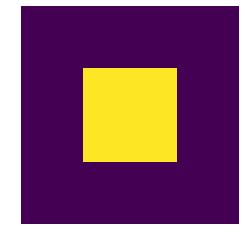

In [116]:
plt.imshow(bright_square)
plt.axis('off')
plt.show()

For our first example of a filter, consider the following filtering array, which we’ll call a “mean kernel”. For each pixel, a kernel defines which neighboring pixels to consider when filtering, and how much to weight those pixels.

In [117]:
mean_kernel = np.full((3, 3), 1/9)

print(mean_kernel)

[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]


Now, let’s take our mean kernel and apply it to every pixel of the image.

Applying a (linear) filter essentially means:

1. Center a kernel on a pixel

2. Multiply the pixels under that kernel by the values in the kernel

3. Sum all the those results

4. Replace the center pixel with the summed result

This process is known as **convolution** (the same process we applied to a signal, but now in 3D!)

In [ ]:
# Import image processing toolbox
import scipy.ndimage as ndi

# Set precision
%precision 2 

print(ndi.correlate(bright_square, mean_kernel))

Below we'll show a short demo of what this looks like. If you're curious how this runs, you can dig into the `convolution_demo.py` file.

In [ ]:
%run convolution_demo.py
mean_filter_interactive_demo(bright_square);

This kind of mean filter is a bit brute. Typically, we'd use a Gaussian filter, where the amount of filtering depends on the distance from the center point. Thankfully, we can do that using the filters module:

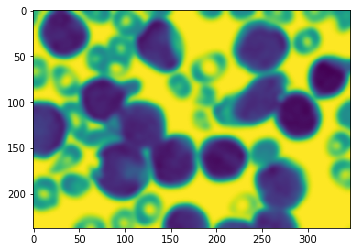

In [108]:
from skimage import filters

gaussian_cells = filters.gaussian(cells_gray,3)

plt.imshow(gaussian_cells)
plt.show()

## Edge filtering
In biology, we often want to filter edges to identify different features within cells, or cells within a piece of tissue. To do so, we'll often use some sort of edge filtering. To give you an intuition for how edge filtering works, first consider taking our step function and convolving it with a filter that is [-1 0 1].

**Note**: For technical signal processing reasons, convolutions actually occur “back to front” between the input array and the kernel. Correlations occur in the signal order, so we’ll use correlate from now on.

In [ ]:
# Recreate the step signal
step_signal = np.zeros(100)
step_signal[50:] = 1

# Convolve it with a [-1 0 1] filter
edge_filter = np.correlate(step_signal, np.array([-1, 0, 1]),
                          mode='valid')

fig, ax = plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(edge_filter, linestyle='dashed', label='correlated')
ax.legend(loc='upper left')
ax.margins(y=0.1) 

Whenever neighboring values are close, the filter response is close to 0. Right at the boundary of a step, we’re subtracting a small value from a large value and and get a spike in the response. This spike “identifies” our edge.

Now, let's apply this to images. Below, we'll just apply one filter, in the vertical direction.

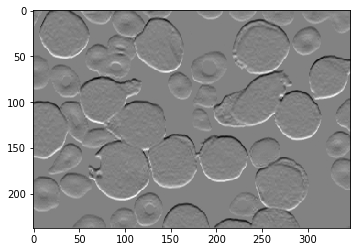

In [112]:
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

gradient_vertical = ndi.correlate(cells_gray.astype(float),vertical_kernel)
plt.imshow(gradient_vertical,cmap='gray')
plt.show()

As you can see, applying a filter in the vertical direction helps us identify horizontal edges. If you change the filter to a horizontal one (`np.array([[-1,0,1]])`) you'll see it does the opposite. Thankfully, there's a commonly used filter, the **Sobel** edge filter, that does this for us. First, let's appreciate what it looks like for our bright square.

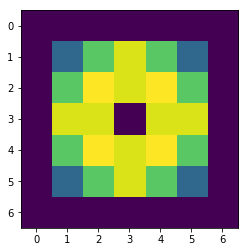

In [96]:
plt.imshow(filters.sobel(bright_square))
plt.show()

Now, let's apply it to our cells! On the left, we'll apply the filter to the raw image. On the right, we'll apply it to the Gaussian filtered image. Note that even just a little bit of preprocessing with a Gaussian filter changes the edge detection!

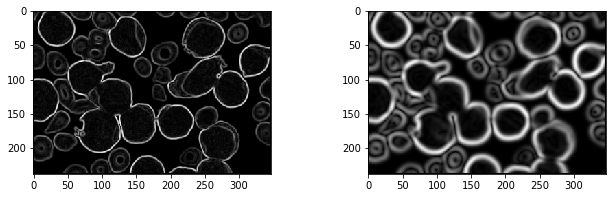

In [113]:
fig,ax = plt.subplots(1,2,figsize=(11,3))

ax[0].imshow(filters.sobel(cells_gray),cmap='gray')
ax[1].imshow(filters.sobel(gaussian_cells),cmap='gray')

plt.show()

## About this notebook

* https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/
* https://jni.github.io/i2k-skimage-napari/lectures/1_image_filters.html#local-filtering